# SCRAPING DATA

In [1]:
import pandas as pd
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
service = webdriver.ChromeService()
driver = webdriver.Chrome(service=service)


In [3]:
title=[]
km=[]
year=[]
fuel=[]
transmission=[]
price=[]
location=[]
models=["volkswagen","mahindra","hyundai","maruti"]
for model in models:
        url = "https://www.cars24.com/buy-used-"+model+"-cars-mumbai/"
        driver.get(url)
        while True:
            last_height = driver.execute_script("return document.body.scrollHeight")
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(3)
            new_height = driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height
        page_source = driver.page_source
        soup = BeautifulSoup(page_source,'html.parser')
        results = soup.find_all('div',{'class':'_2YB7p'})
        for car in results:
            try:
                title.append(car.find('h3',{'class':'_11dVb'}).get_text())
            except:
                title.append('n/a')
            try:
                km.append(car.select('ul._3J2G- > li')[0].get_text())
            except:
                km.append('n/a')
            try:
                year.append(car.find('h3',{'class':'_11dVb'}).get_text().split()[0])
            except:
                year.append('n/a')
            try:
                fuel.append(car.select('ul._3J2G- > li')[2].get_text())
            except:
                fuel.append('n/a')
            try:
                transmission.append(car.select('ul._3J2G- > li')[4].get_text())
            except:
                transmission.append('n/a')
            try:
                price.append(car.find('strong',{'class':'_3RL-I'}).get_text())
            except:
                price.append('n/a')
            try:
                location.append(car.select('p._3dGMY > span')[1].get_text(strip=True).replace(", Mumbai", "").strip())
            except:
                location.append('n/a')
        

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=127.0.6533.100)
Stacktrace:
	GetHandleVerifier [0x00007FF77D8B9632+30946]
	(No symbol) [0x00007FF77D86E3C9]
	(No symbol) [0x00007FF77D766FDA]
	(No symbol) [0x00007FF77D73CB85]
	(No symbol) [0x00007FF77D7E37A7]
	(No symbol) [0x00007FF77D7FA771]
	(No symbol) [0x00007FF77D7DC813]
	(No symbol) [0x00007FF77D7AA6E5]
	(No symbol) [0x00007FF77D7AB021]
	GetHandleVerifier [0x00007FF77D9EF83D+1301229]
	GetHandleVerifier [0x00007FF77D9FBDB7+1351783]
	GetHandleVerifier [0x00007FF77D9F2A03+1313971]
	GetHandleVerifier [0x00007FF77D8EDD06+245686]
	(No symbol) [0x00007FF77D87758F]
	(No symbol) [0x00007FF77D873804]
	(No symbol) [0x00007FF77D873992]
	(No symbol) [0x00007FF77D86A3EF]
	BaseThreadInitThunk [0x00007FF96B9A257D+29]
	RtlUserThreadStart [0x00007FF96BE6AF28+40]


In [ ]:
Cars = pd.DataFrame({'Name':title,'Year':year,'Km Driven':km,'Fuel Type':fuel,'Transmission':transmission,'Price':price,'Location':location})

In [ ]:
Cars

,Name,Year,Km Driven,Fuel Type,Transmission,Price,Location
0,Volkswagen Ameo COMFORTLINE 1.0L,2019,34651,Petrol,Manual,5.72 Lakh,Seawood
1,Volkswagen Ameo TRENDLINE 1.0L,2018,58154,Petrol,Manual,4.07 Lakh,Goregaon
2,Volkswagen Polo GT TSI AT,2016,79095,Petrol,Automatic,5.06 Lakh,Mulund West
3,Volkswagen Vento HIGHLINE PLUS 1.0L TSI AT,2020,89509,Petrol,Automatic,8.60 Lakh,Mulund West
4,Volkswagen Vento HIGHLINE 1.6 MPI,2014,92449,Petrol,Manual,4.03 Lakh,Goregaon
...,...,...,...,...,...,...,...
401,Maruti Ciaz ZXI,2015,85633,Petrol,Manual,4.76 Lakh,Mumbai
402,Maruti Swift VXI,2012,15045,Petrol,Manual,3.15 Lakh,Mumbai
403,Maruti Wagon R 1.0 VXI,2012,32422,Petrol,Manual,2.51 Lakh,Mumbai
404,Maruti S PRESSO VXI CNG,2020,26321,CNG,Manual,4.31 Lakh,Mumbai


# DATA CLEANING

In [ ]:
Cars.dtypes

Name            object
Year            object
Km Driven       object
Fuel Type       object
Transmission    object
Price           object
Location        object
dtype: object

In [ ]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          406 non-null    object
 1   Year          406 non-null    object
 2   Km Driven     406 non-null    object
 3   Fuel Type     406 non-null    object
 4   Transmission  406 non-null    object
 5   Price         406 non-null    object
 6   Location      406 non-null    object
dtypes: object(7)
memory usage: 22.3+ KB


In [ ]:
Cars.isnull().sum()

Name            0
Year            0
Km Driven       0
Fuel Type       0
Transmission    0
Price           0
Location        0
dtype: int64

In [ ]:
print(Cars.drop_duplicates(inplace=True))

None


In [ ]:
Cars['Year'] = Cars["Year"].astype(int)

In [ ]:
Cars['Km Driven'] = [int(str(i).replace(',', '').replace('km', '')) if isinstance(i, str) else i for i in Cars['Km Driven']]

In [ ]:
Cars.describe()

,Year,Km Driven
count,406.000000,406.000000
mean,2017.128079,48629.977833
std,2.790345,25602.359212
min,2011.000000,1958.000000
25%,2015.000000,29785.500000
50%,2017.000000,45842.500000
75%,2019.000000,65599.500000
max,2023.000000,122248.000000


In [ ]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          406 non-null    object
 1   Year          406 non-null    int32 
 2   Km Driven     406 non-null    int64 
 3   Fuel Type     406 non-null    object
 4   Transmission  406 non-null    object
 5   Price         406 non-null    object
 6   Location      406 non-null    object
dtypes: int32(1), int64(1), object(5)
memory usage: 20.7+ KB


In [ ]:
Cars["Price"].replace(" Lakh","")

0      ₹5.72 Lakh
1      ₹4.07 Lakh
2      ₹5.06 Lakh
3      ₹8.60 Lakh
4      ₹4.03 Lakh
          ...    
401    ₹4.76 Lakh
402    ₹3.15 Lakh
403    ₹2.51 Lakh
404    ₹4.31 Lakh
405    ₹2.69 Lakh
Name: Price, Length: 406, dtype: object

In [ ]:
Cars["Price"] = Cars["Price"].str.lstrip("₹")

In [ ]:
Cars['Name'] = Cars['Name'].apply(lambda x: ' '.join(x.split(' ')[1:]))

In [ ]:
Cars["Location"]=Cars["Location"].replace("n/a","Mumbai")

To Find the Average Price based on Transmission Type

In [ ]:
#To remove Lakhs 
import pandas as pd
def convert_price(price_str):

    if 'Lakh' in price_str:     
        return float(price_str.replace('Lakh', '').strip()) * 100000
    return float(price_str.replace(',', '').strip())
    
Cars['Price'] = Cars['Price'].apply(convert_price)

print(Cars.head())

                                         Name  Year  Km Driven Fuel Type  \
0            Volkswagen Ameo COMFORTLINE 1.0L  2019      34651    Petrol   
1              Volkswagen Ameo TRENDLINE 1.0L  2018      58154    Petrol   
2                   Volkswagen Polo GT TSI AT  2016      79095    Petrol   
3  Volkswagen Vento HIGHLINE PLUS 1.0L TSI AT  2020      89509    Petrol   
4           Volkswagen Vento HIGHLINE 1.6 MPI  2014      92449    Petrol   

  Transmission     Price     Location  
0       Manual  572000.0      Seawood  
1       Manual  407000.0     Goregaon  
2    Automatic  506000.0  Mulund West  
3    Automatic  860000.0  Mulund West  
4       Manual  403000.0     Goregaon  


In [ ]:
# Calculate the average price for each transmission type
average_prices = Cars.groupby('Transmission')['Price'].mean()

print("Average Prices by Transmission Type:")
for transmission_type, avg_price in average_prices.items():
    print(f"{transmission_type}: ${avg_price:.2f}")


Average Prices by Transmission Type:
Automatic: $742339.81
Manual: $504399.34


# Exploratory Data Analysis

### Price vs Year

In [ ]:
a=Cars['Price']

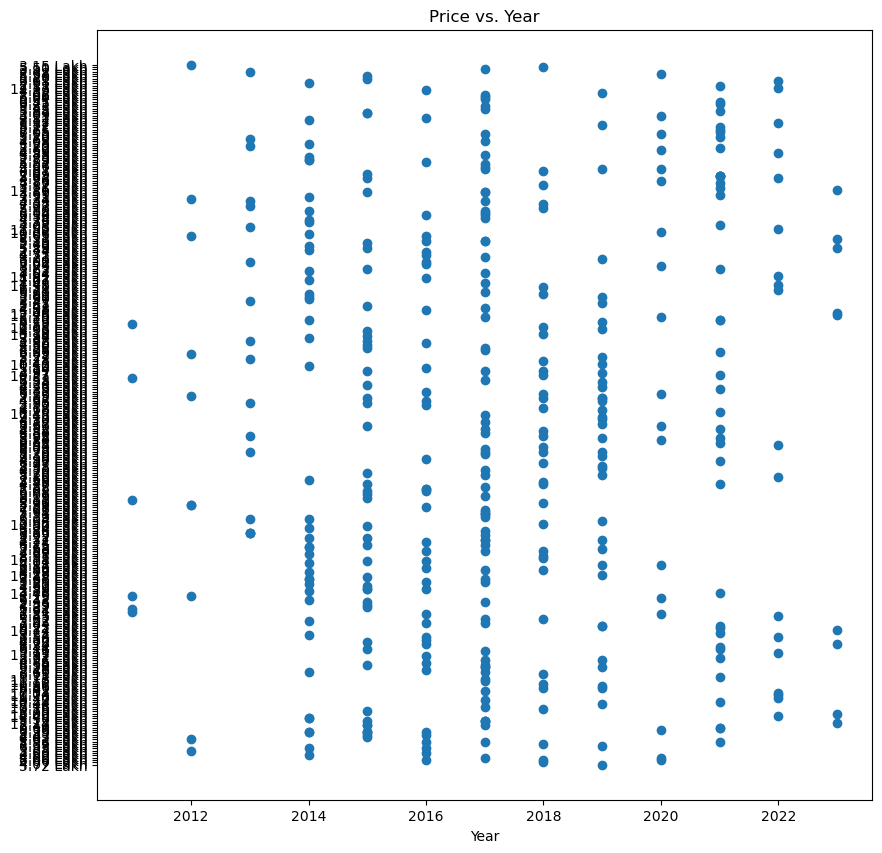

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(Cars['Year'],a)
plt.title('Price vs. Year')
plt.xlabel('Year')

plt.show()

### Price vs KM Driven

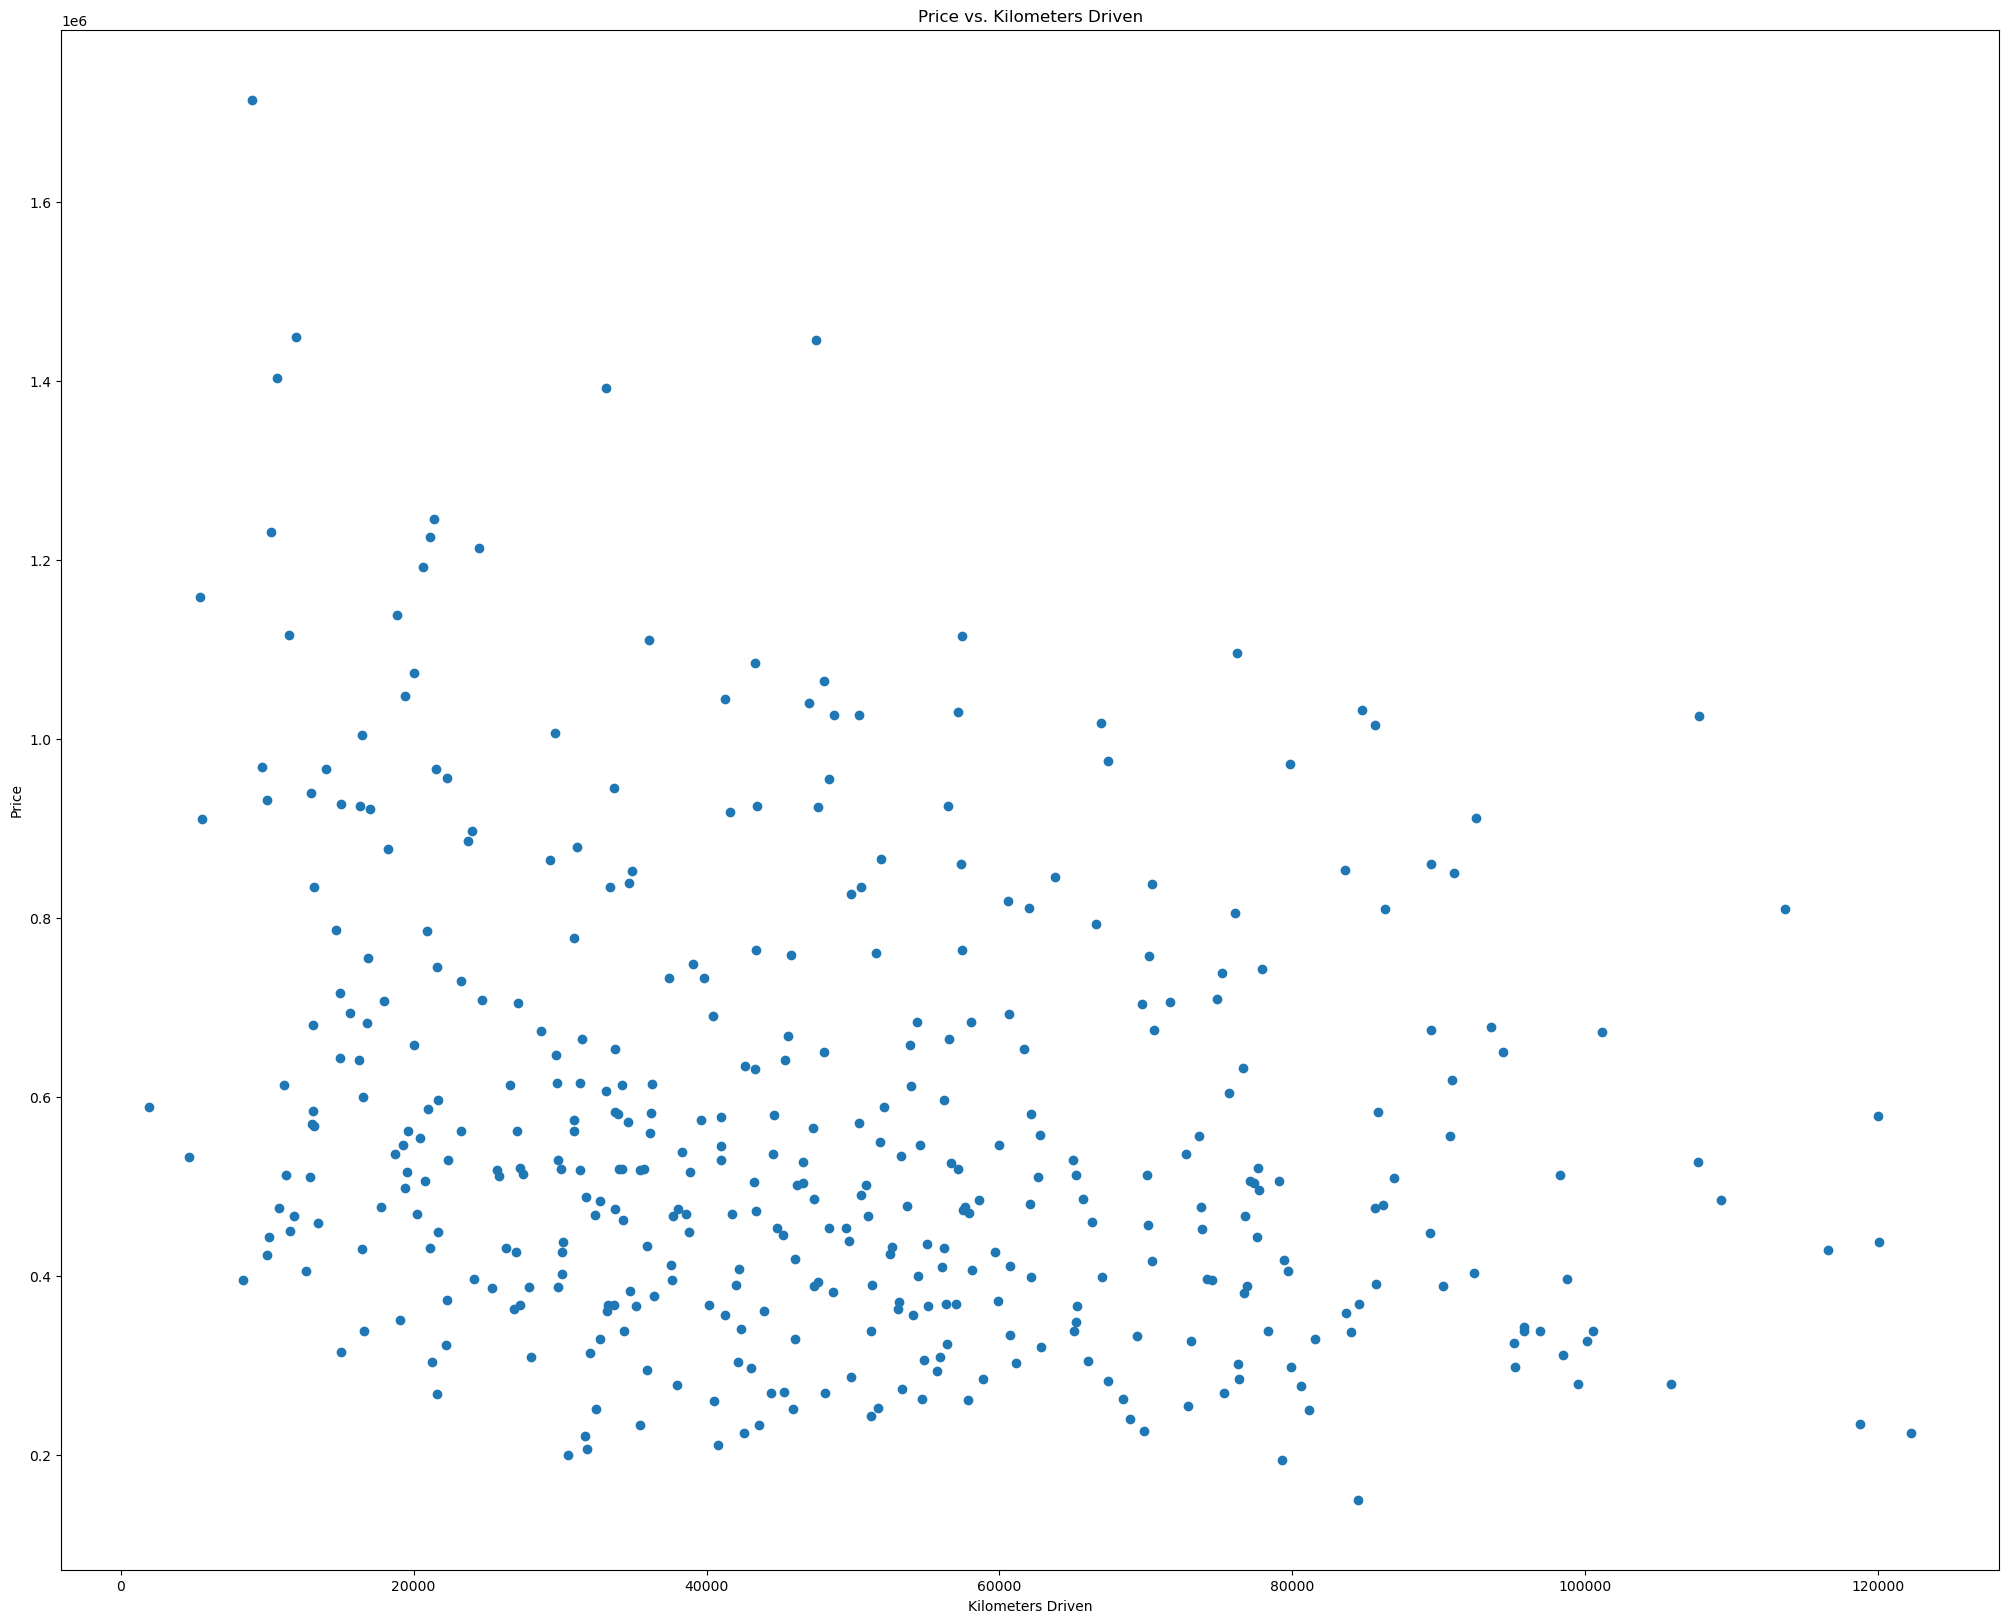

In [ ]:
plt.figure(figsize=(25, 20))
plt.scatter(Cars['Km Driven'], a)
plt.title('Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

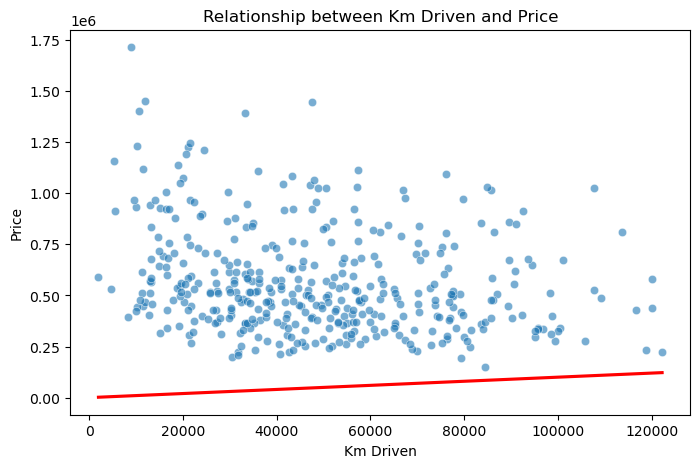

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Km Driven', y='Price', data=Cars, alpha=0.6)
sns.regplot(x='Km Driven', y='Km Driven', data=Cars, scatter=False, color='red')
plt.title('Relationship between Km Driven and Price')
plt.xlabel('Km Driven')
plt.ylabel('Price')
plt.show()
plt.savefig('plot.png')  

In [ ]:
import os
print(os.getcwd())

C:\Users\truno janaki


### Price vs Transmission

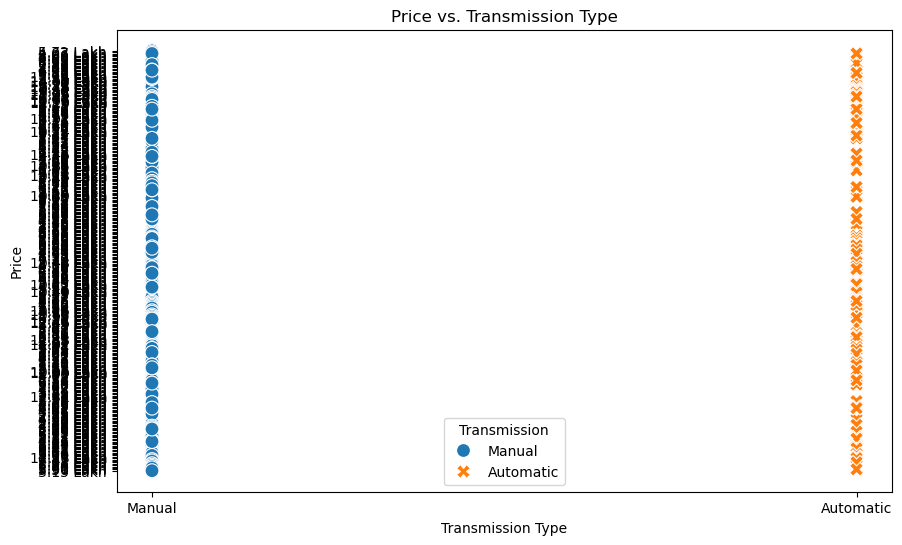

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Transmission', y='Price', data=Cars, hue='Transmission', style='Transmission', s=100)
plt.title('Price vs. Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.show()

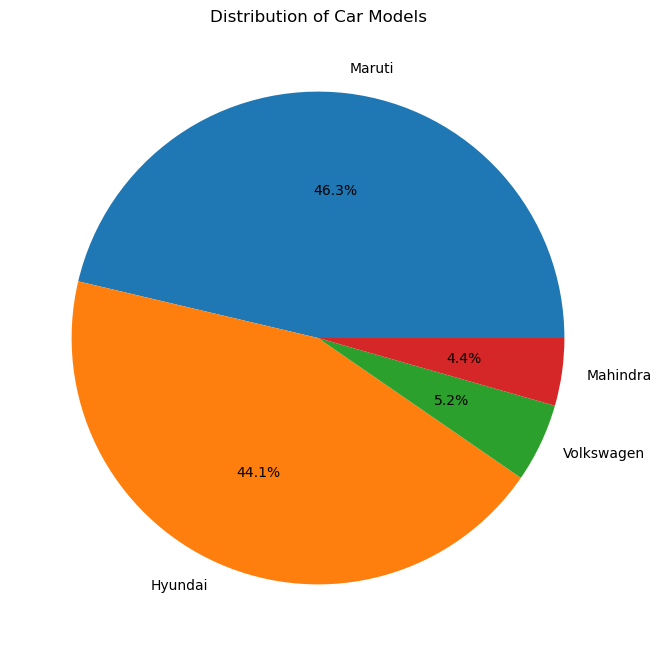

In [ ]:
Name =Cars["Name"].str.split(" ",expand=True)
Name[0]
plt.figure(figsize=(8, 8))
Name[0].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Car Models')
plt.ylabel('')
plt.show()

### Distribution of fuel type

In [ ]:
Cars["Fuel Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

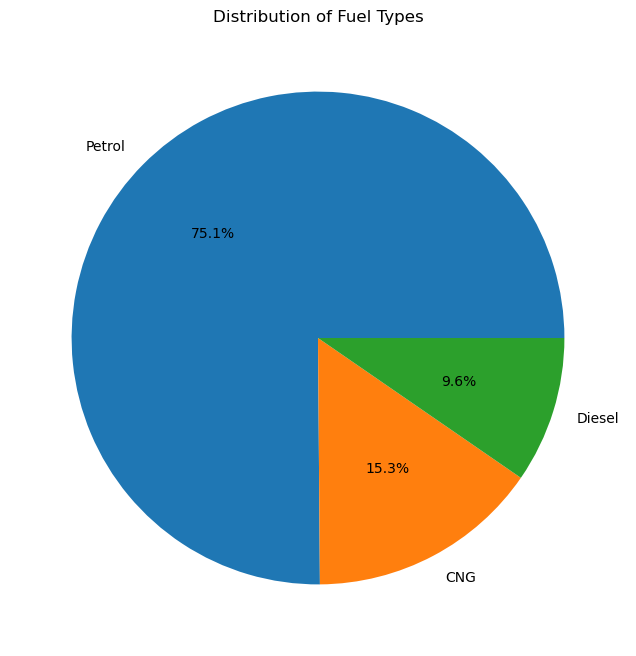

In [ ]:
plt.figure(figsize=(8, 8))
Cars['Fuel Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Fuel Types')
plt.ylabel('')
plt.show()

### Distribution of transmission type

In [ ]:
a = Cars['Price'].map(lambda x: x.replace(" Lakh",''))
a= a.astype(float)
a=a.map(lambda x:x*100000).astype(int)
print(a)

0      572000
1      407000
2      505999
3      860000
4      403000
        ...  
401    476000
402    315000
403    250999
404    430999
405    269000
Name: Price, Length: 406, dtype: int32


<Axes: >

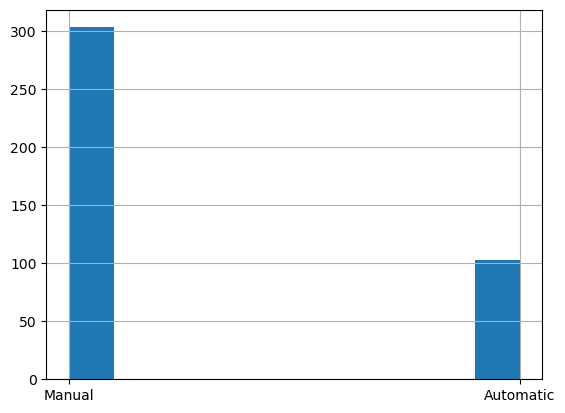

In [ ]:
Cars['Transmission'].hist()

In [ ]:
sns.ba

AttributeError: module 'seaborn' has no attribute 'a'

### Distribution of car models

In [ ]:
Cars.to_csv('Cars.csv', index=False)

In [ ]:
Cars['Price'].to_csv("Price.csv",index=False)